In [2]:
import random, json, shutil
import imageio, xmltodict, cv2
from IPython.display import HTML, Video
from tqdm.auto import tqdm
from pathlib import Path
from PIL import Image

In [7]:
# 랜덤하게 보기
REL_ROOT = '../../data1/IMG-1920/'
sub_dir  = lambda d: [f for f in Path(d).iterdir() if f.is_dir()]
sub_file = lambda d, suffix: [f for f in Path(d).iterdir() if f.suffix==suffix] 
   
clips = sub_dir(REL_ROOT)
clips = [(c.name, sorted(sub_file(c, '.jpg'))) for c in clips]
print('len(clips):', len(clips))
clips = [c for c in clips if len(c[1]) == 300]
print('len(clips):', len(clips))
err_clips = []
for c, fs in clips:
    if len(fs) != 300:
        print(len(fs), c)
        err_clips.append(c)
wd = [c for c, fs in clips if '114-4_cam01_swoon03_place03_day_summer' in c]
len(wd), wd

len(clips): 823
len(clips): 823


(1, ['114-4_cam01_swoon03_place03_day_summer'])

117-6_cam01_swoon01_place04_night_spring_06040.jpg


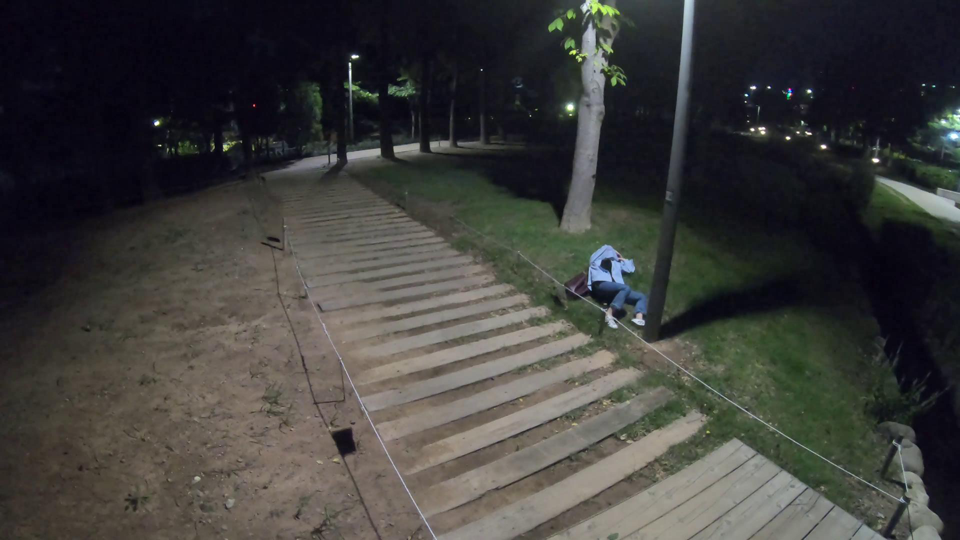

In [69]:
clip, fs = random.choice(clips)
last = fs[-1]
print(Path(last).name)
Image.open(last).resize((960, 540))

In [83]:
# 비디오 보기
# 파일 리스트
REL_ROOT = '../../data1/VOD-1920/05_Swoon/'

sub_dir  = lambda d: [f for f in Path(d).iterdir() if f.is_dir()]
sub_file = lambda d, suffix: [f for f in Path(d).iterdir() if f.suffix==suffix] 

   
dirs = sum([sub_dir(d) for d in sub_dir(REL_ROOT)], [])
xmls = sorted(sum([sub_file(d, '.xml') for d in dirs], []))
mp4s = [f.with_suffix('.mp4')for f in xmls]
files = list(zip(mp4s, xmls))
print(len(files))



# 비디오 플레이
def show_video(file, width = 640):
    display(Video(file, width=width, html_attributes='controls autoplay'))
    
def read_xml(xml):
    with open(xml) as xml_file:
        anno = xmltodict.parse(xml_file.read())['annotation']
    xml_file.close()
    return anno

877


In [ ]:
#idx = -1
#idx += 1
#clip = err_clips[idx]
#clip = random.choice(clips)[0]
print(clip)
xml = [e for e in xmls if '114-4_cam01_swoon03_place03_day_summer' in str(e)][1]
mp4 = xml.with_suffix('.mp4')
show_video(mp4)
read_xml(xml)

In [ ]:
#전체 저장
out_base = '/data1/IMG-LAST/'
for c, fs in tqdm(clips):
    f = fs[-1]
    out_path = Path(out_base)/f.name
    Image.open(f).save(out_path)